# Unsupervised Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**CB3: Atlegang Mogane, Lebogang Gift Molepo, Mbalenhle Malinga, Mike Ngwenya,Alette Baloyi**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.


### Predict Overview: Movie Recommendation 2022
![image.png](https://miro.medium.com/max/750/1*aomtzVof6RLiI3L4_V9aSw.jpeg)

In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

With this context, EDSA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing

# Table of Contents
### [1. Introduction](#introduction)

### [2. Problem Statement](#2-problem-statement)

### [3. Import libaries and datasets](#libaries)

### [4. Exploratory Data Analysis](#eda)
*  [Visualizing the null values for each dataframe](#sub1)
*  [Visualizing the dataframes](#sub2)
*  [Merging datasets](#sub3)
*  [Word cloud](#sub4)

### [5. Data enginereing](#prep)

### [6. Modelling](#mod)

* [Content-Based Filtering Recommendation](#CB)
* [Collaborative-Based Filtering Reccomendation](#CB1)


### [7. Evaluation](#eva)
* [Hyperparameter Tuning](#HPT)

### [8. Submission](#sub)

### [9. Conclusion](#conc)


# [1. Introduction](#introduction)

The growth of information on the internet offers a variety of possibilities while simultaneously making the user's search more difficult. The recommendation system uses machine learning to examine the user's historical preferences in order to account for this complexity. Numerous applications for recommender systems exist, such as marketing and consumer websites. As an illustration, the Takealot website suggests more things when someone orders a product based on what other customers have bought. A recommender system basically predicts all the associated television shows, articles, books, and other content based on the user's pick.

Most recommender systems fall into one of two categories, with a third category perhaps mixing the first two.Collaborative filtering is the first, while content filtering is the second. A model is created via collaborative filtering based on a user's prior behavior (past purchases) and the behavior of others who behave similarly. Collaboration between users results in personalized recommendations frequently. Collaborative filtering is used by Netflix, iTunes, YouTube, Amazon, and IMDB, among others. In this project, we will focus on the collaborative filtering method, which involves presenting the user with recommendations based on what other users who share their tastes have previously rated.



We will develop a movie recommender system in the first section after learning about EDA and recommender systems (Content-based Filtering). The model will then be put into use on the streamlit website, where we will receive real-time forecasts.

# [2. Problem Statement](#2-problem-statement)

Our team has been challenged with constructing a movie recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.

# [3. Import libaries and datasets](#libaries)

In [1]:
# Install packages
# Packages for data processiong
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import re
from scipy.sparse import csr_matrix
import surprise
from surprise.model_selection import train_test_split
import time
from surprise import SVD
from surprise import accuracy
import scipy as sp
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline  import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, Normalizer
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Packages for visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time

# Packages to avoid warnings
import warnings
warnings.filterwarnings("ignore")
#function to view dataframes side by side
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

# Packages for saving models
import pickle

# Ramdomization
import random

sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})    


### Loading all Necessary Data sets

In [2]:
#loading data 
train_df = pd.read_csv('train.csv')
tags_df  = pd.read_csv('tags.csv')
movies_df = pd.read_csv('movies.csv')
imbd_data_df  = pd.read_csv('imdb_data.csv')
genome_tags = pd.read_csv('genome_tags.csv')
genome_scores  =pd.read_csv('genome_scores.csv')
test_df  = pd.read_csv('test.csv')
links_df = pd.read_csv('links.csv')
ratings_df = pd.read_csv('ratings.csv')

# visualize the dataset
display_side_by_side(ratings_df.head(2),movies_df.head(2),imbd_data_df.head(1), tags_df.head(2),genome_tags.head(2),
                    genome_scores.head(2),links_df.head(2),titles =
                   ['rating','movies','imbd_data', 'tags', 'genome_tags', 'genome_scores', 'links'])

rating 
 
 
 
 userId 
 movieId 
 rating 
 timestamp 
 
 
 
 
 0 
 1 
 31 
 2.5 
 1260759144 
 
 
 1 
 1 
 1029 
 3.0 
 1260759179 
 
 
 movies 
 
 
 
 movieId 
 title 
 genres 
 
 
 
 
 0 
 1 
 Toy Story (1995) 
 Adventure|Animation|Children|Comedy|Fantasy 
 
 
 1 
 2 
 Jumanji (1995) 
 Adventure|Children|Fantasy 
 
 
 imbd_data 
 
 
 
 movieId 
 title_cast 
 director 
 runtime 
 budget 
 plot_keywords 
 
 
 
 
 0 
 1 
 Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette|Jack Angel|Spencer Aste 
 John Lasseter 
 81.0 
 $30,000,000 
 toy|rivalry|cowboy|cgi animation 
 
 
 tags 
 
 
 
 userId 
 movieId 
 tag 
 timestamp 
 
 
 
 
 0 
 3 
 260 
 classic 
 1439472355 
 
 
 1 
 3 
 260 
 sci-fi 
 1439472256 
 
 
 genome_tags 
 
 
 
 tagId 
 tag 
 
 
 
 
 0 
 1 
 007 
 
 
 1 
 2 
 007 (series) 
 
 
 genome_scores 
 
 
 
 movieId 
 tagId 
 relevance 
 
 
 
 
 0 
 1 
 1 
 0.02875 
 
 
 1 
 1 
 2 
 0.02375 
 
 
 links 
 
 
 
 movieId 
 imdbId 
 tmdbId 
 
 
 
 
 0 
 1 
 114709 
 862.0 
 
 
 1 
 2 
 113497 
 8844.0

# [5. Exploratory Data Analysis](#eda)

Exploratory data analysis is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modelling or hypothesis testing task.

This process is essential because it helps us:
 * Understand and clean up the given dataset.
 * Have a clear picture of the features and the relationships between them.
 * By providing guidelines for essential variables and leaving behind/removing non-essential variables.
 * Handle Missing values.
 * Identify outliers.



Let's first take a look at the shape of all the datasets in order to have a general overview.

In [4]:
print(f"genome_tags shape is {genome_tags.shape}")
print(f"genome_scores shape is {genome_scores.shape}")
print(f"movies shape is {movies_df.shape}")
print(f"imbd_data shape is {imbd_data_df.shape}")
print(f"links shape is {links_df.shape}")
print (f'rating shape is{ratings_df.shape}')#print(train.iloc[::250000, :])
print (f'tags shape is{tags_df.shape}')
print(f"train shape is{train_df.shape}")

genome_tags shape is (1128, 2)
genome_scores shape is (15584448, 3)
movies shape is (62423, 3)
imbd_data shape is (27278, 6)
links shape is (62423, 3)
rating shape is(100004, 4)
tags shape is(1093360, 4)
train shape is(10000038, 4)


* ### [Visualizing the null values for each dataframe](#sub2)

In [5]:
#check null values of the datasets
print(f"genome_tags null values is: {genome_tags.isnull().mean()*100}")
print(f"genome_scores null values is: {genome_scores.isnull().mean()*100}")
print(f"movies shape null values is: {movies_df.isnull().mean()*100}")
print(f"imbd_data null values is: {imbd_data_df.isnull().mean()*100}")
print(f"links null values is: {links_df.isnull().mean()*100}")
print (f'rating null values is:{ratings_df.isnull().mean()*100}')
print (f'tags null values is:{tags_df.isnull().mean()*100}')

genome_tags null values is: tagId    0.0
tag      0.0
dtype: float64
genome_scores null values is: movieId      0.0
tagId        0.0
relevance    0.0
dtype: float64
movies shape null values is: movieId    0.0
title      0.0
genres     0.0
dtype: float64
imbd_data null values is: movieId           0.000000
title_cast       36.908864
director         36.197668
runtime          44.317765
budget           71.016937
plot_keywords    40.611482
dtype: float64
links null values is: movieId    0.000000
imdbId     0.000000
tmdbId     0.171411
dtype: float64
rating null values is:userId       0.0
movieId      0.0
rating       0.0
timestamp    0.0
dtype: float64
tags null values is:userId       0.000000
movieId      0.000000
tag          0.001463
timestamp    0.000000
dtype: float64


In [6]:
train_count = pd.DataFrame(train_df.isnull().sum())
test_count = pd.DataFrame(test_df.isnull().sum())
tags_count = pd.DataFrame(tags_df.isnull().sum())
movies_count = pd.DataFrame(movies_df.isnull().sum())
links_count = pd.DataFrame(links_df.isnull().sum())
imdb_count = pd.DataFrame(imbd_data_df.isnull().sum())
genomet_count = pd.DataFrame(genome_tags.isnull().sum())
genomes_count = pd.DataFrame(genome_scores.isnull().sum())

In [8]:
train_count


,0
userId,0
movieId,0
rating,0
timestamp,0


In [9]:
test_count

,0
userId,0
movieId,0


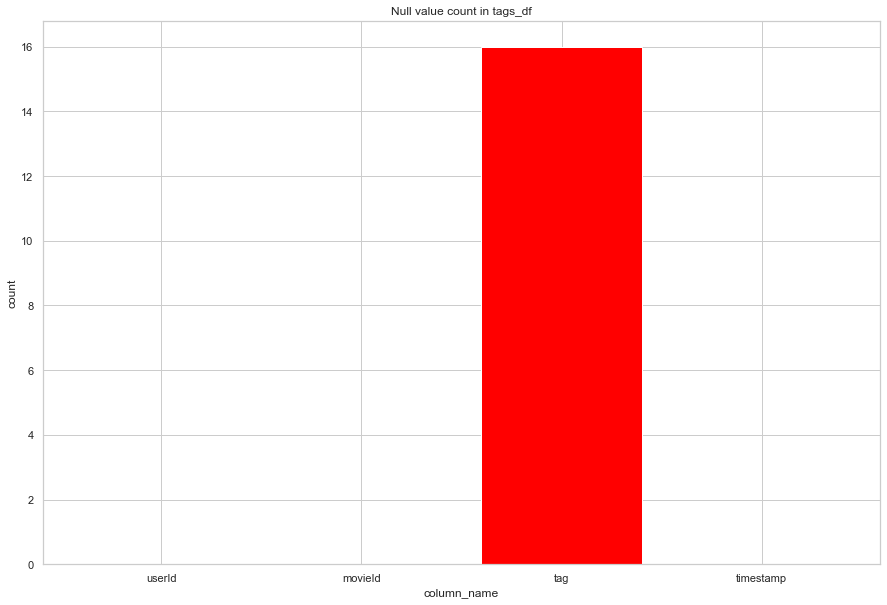

In [10]:
plt.bar(tags_count.index,
        tags_count.values.reshape(len(tags_count), ),
        color='red')
plt.xlabel('column_name')
plt.ylabel('count')
plt.title('Null value count in tags_df')
plt.show()

In [11]:
movies_count

,0
movieId,0
title,0
genres,0


In [12]:
links_count


,0
movieId,0
imdbId,0
tmdbId,107


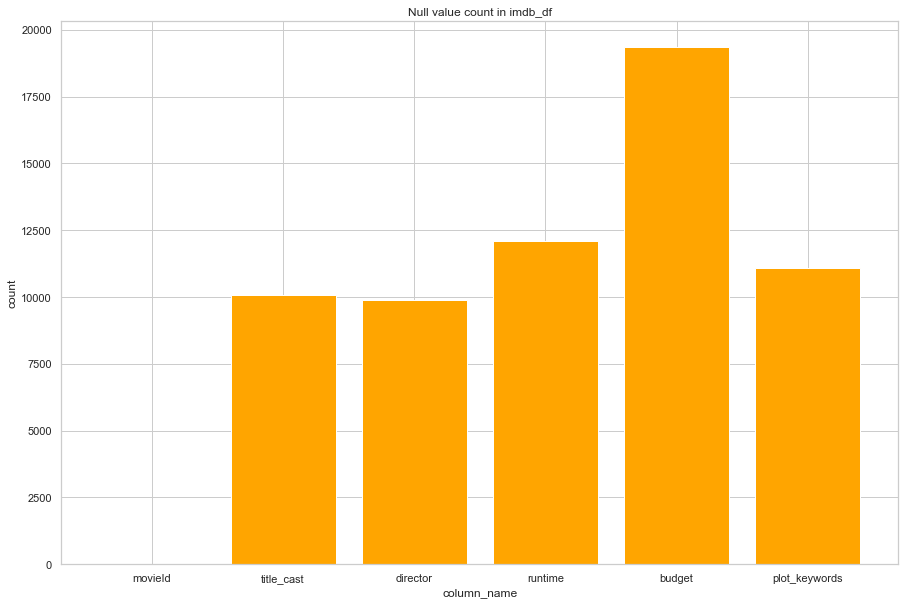

In [13]:
plt.bar(imdb_count.index,
        imdb_count.values.reshape(len(imdb_count), ),
        color='orange')
plt.xlabel('column_name')
plt.ylabel('count')
plt.title('Null value count in imdb_df')
plt.show()

In every dataset it is important to know if your dataset has missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is critical during the preprocessing of the dataset, as many machine learning algorithms do not support missing values.

The DataFrame's with null values include the tags_df and imdb_df.
In the imdb_data_df, there are five columns with null values, with the budget column having the most null values of over 18000. 
In the tags_df, the column with null values is the tag column as seen by the red bar in the Null value count in tags_df bar graph.
There are several methods for dealing with missing values. This includes:

1. Deleting Rows with missing values
2. Impute missing values for continuous variable
3. Impute missing values for categorical variable
4. Other Imputation Methods
5. Using Algorithms that support missing values
6. Prediction of missing values
7. Imputation using Deep Learning Library

* ### [Visualizing the dataframes](#sub3)

In [14]:
num_users = len(ratings_df.userId.unique())
num_items = len(ratings_df.movieId.unique())
print('There are {} unique users and {} unique movies in this data set'.format(num_users, num_items))

There are 671 unique users and 9066 unique movies in this data set


In [15]:
#get count
df_ratings_count = pd.DataFrame(ratings_df.groupby('rating').size(), columns=['count'])
df_ratings_count

,count
rating,
0.5,1101
1.0,3326
1.5,1687
2.0,7271
2.5,4449
3.0,20064
3.5,10538
4.0,28750
4.5,7723


In [16]:
#total ratings
total_cnt = df_ratings_count['count'].sum()
total_cnt

100004

<AxesSubplot:xlabel='rating'>

<Figure size 720x360 with 0 Axes>

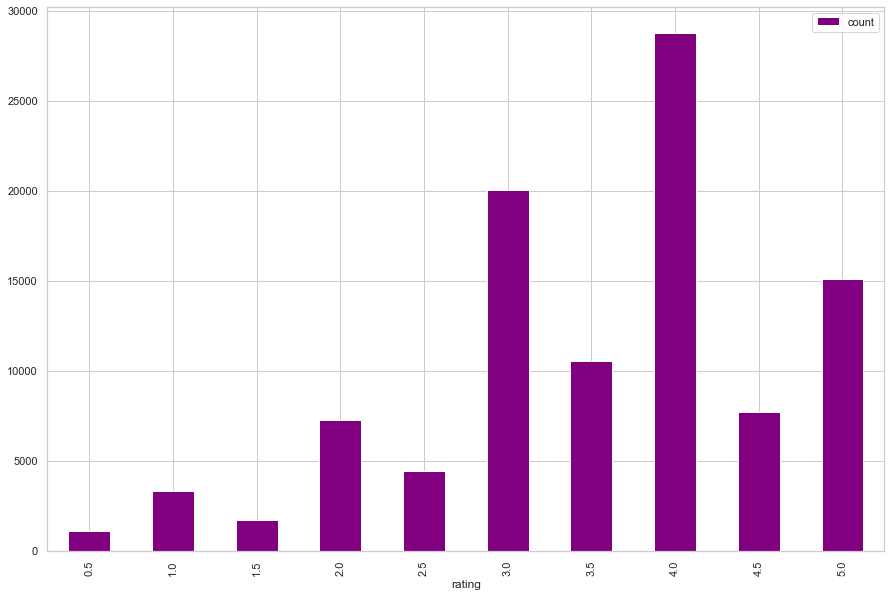

In [17]:
#plotting bar chart to represent count per rating category
plt.figure(figsize =(10,5))

pd.DataFrame(ratings_df.groupby('rating').size(), columns=['count']).plot(kind ='bar', color = 'purple')

In [18]:
# get rating frequency
df_movies_cnt = pd.DataFrame(ratings_df.groupby('movieId').size(), columns=['count'])
df_movies_cnt.head()

,count
movieId,
1,247
2,107
3,59
4,13
5,56


Text(0, 0.5, 'number of ratings')

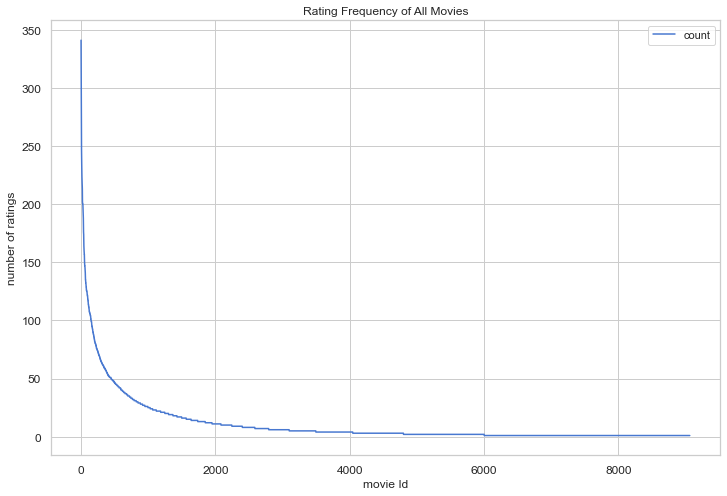

In [19]:
# plot rating frequency of all movies
ax = df_movies_cnt \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(12, 8),
        title='Rating Frequency of All Movies',
        fontsize=12
    )
ax.set_xlabel("movie Id")
ax.set_ylabel("number of ratings")

The distribution of movie ratings frequently satisfies a property known as the long-tail property in real-world settings. The long tail property is supported by two hypotheses: the first is that the majority of consumers consistently follow the crowd and only a minority are interested in niche content; the second is that everyone is a bit eccentric, consuming both popular and specialty products. We discovered that the first hypothesis was correct. The vast majority of movies are rarely rated. As a result, the underlying ratings have a highly skewed distribution. Let's look at the movie distribution quartiles by rating now.

In [20]:
df_movies_cnt['count'].quantile(np.arange(1, 0.4, -0.1))

1.0    341.0
0.9     28.0
0.8     13.0
0.7      7.0
0.6      4.0
0.5      3.0
Name: count, dtype: float64

We can see that approximately 1% of movies have 32831 ratings, 10% have 252, 20% have 49, and 50% have four ratings. Because we have so many movies, we'll limit it to the top 25%. We want to limit our dataset to roughly 33147 movies for two reasons. We don't want the "MemoryError" to occur during model training.

1.Improve model performance: less well-known films have fewer ratings, making the pattern noisier.

2.Reducing the number of movies you watch can help you make better recommendations.

In [21]:
# filter data
popularity_thres = 48
popular_movies = list(set(df_movies_cnt.query('count >= @popularity_thres').index))
df_ratings_drop_movies = ratings_df[ratings_df.movieId.isin(popular_movies)]

print('shape of original ratings data: ', ratings_df.shape)
print('shape of ratings data after dropping unpopular movies: ', df_ratings_drop_movies.shape)

shape of original ratings data:  (100004, 4)
shape of ratings data after dropping unpopular movies:  (44733, 4)


In [22]:
# get number of ratings given by every user
df_users_cnt = pd.DataFrame(df_ratings_drop_movies.groupby('userId').size(), columns=['count'])
df_users_cnt.head()

,count
userId,
1,5
2,57
3,30
4,110
5,80


In [23]:
df_users_cnt['count'].quantile(np.arange(1, 0.4, -0.1))

1.0    429.0
0.9    157.1
0.8     98.4
0.7     74.0
0.6     55.0
0.5     42.0
Name: count, dtype: float64

When popular movies are viewed, a similar pattern is observed with active users. We can see that approximately 1% of users (3277), 10% of approximately 140, 20% with 80 users, and 70% with 53 users. This will be our arbitrary threshold for removing users with few ratings.

In [24]:
# filter data
ratings_thres = 53
active_users = list(set(df_users_cnt.query('count >= @ratings_thres').index))
df_ratings_drop_users = df_ratings_drop_movies[df_ratings_drop_movies.userId.isin(active_users)]

print('shape of original ratings data: ', ratings_df.shape)
print('shape of ratings data after dropping both unpopular movies and inactive users: ', df_ratings_drop_users.shape)

shape of original ratings data:  (100004, 4)
shape of ratings data after dropping both unpopular movies and inactive users:  (34786, 4)


In [25]:
new_df =df_ratings_drop_users.copy()

To get more insights into the datasets we need to merge datesets to create one dataframe. We will start with the movies and the new_df

* ### [Merging datasets](#sub4)

In [26]:
#To get more insights on the dataframes
#we will use the original ratings dataframe since new_df has been altered
movie_df = pd.merge(ratings_df,movies_df, on  = 'movieId')
movie_df

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama
...,...,...,...,...,...,...
99556,664,64997,2.5,1343761859,War of the Worlds (2005),Action|Sci-Fi
99557,664,72380,3.5,1344435977,"Box, The (2009)",Drama|Horror|Mystery|Sci-Fi|Thriller
99558,665,129,3.0,995232528,Pie in the Sky (1996),Comedy|Romance
99559,665,4736,1.0,1010197684,Summer Catch (2001),Comedy|Drama|Romance


In [27]:
#dataframe for average rating
avg_movie_df = movie_df.groupby('title')['rating'].mean().sort_values(ascending = False).reset_index().rename(columns= {'rating': 'average_rating'})
movies_ranting_count = movie_df.groupby('title')['rating'].count().sort_values(ascending = True).reset_index().rename(columns= {'rating': 'rating_count'})
#meging the two dataframes
movies_rating_count_df = movies_ranting_count.merge(round(avg_movie_df,0), on= 'title')
movies_rating_count_df

,title,rating_count,average_rating
0,"Last Metro, The (Dernier métro, Le) (1980)",1,2.0
1,"Lifeguard, The (2013)",1,2.0
2,Light Sleeper (1992),1,4.0
3,Light Years (Gandahar) (1988),1,4.0
4,Lightning in a Bottle (2004),1,4.0
...,...,...,...
8855,Star Wars: Episode IV - A New Hope (1977),291,4.0
8856,"Silence of the Lambs, The (1991)",304,4.0
8857,"Shawshank Redemption, The (1994)",311,4.0
8858,Pulp Fiction (1994),324,4.0


From the plot above we can see that the most rated or liked movie is Shawshank Redemption with average rating of 4.0 and Love's coming together with Love;s brother with average rating of 2.0.

<AxesSubplot:xlabel='rating', ylabel='Count'>

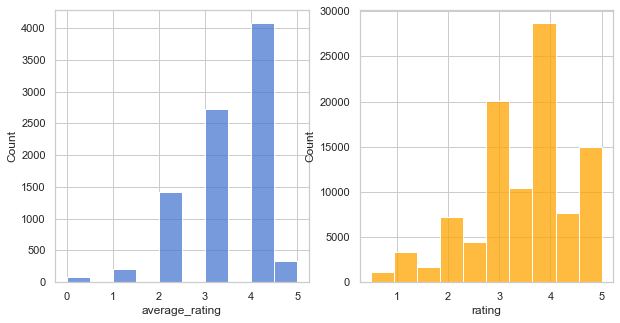

In [28]:
plt.figure(figsize =(10,5))
plt.subplot(1,2, 1)
sns.histplot(data= movies_rating_count_df, x= 'average_rating', bins = 10)

plt.subplot(1,2, 2)
sns.histplot(data= movie_df, x= 'rating', bins = 10, color= 'orange')

Observation: The plots show that the rating distribution is different. When the rating is taken without the average, there are a large number of rated movies, which can lead to the bias of thinking a movie is highly rated when it was only rated by a few people. The change has been effected into the new_df, where inactive users and low rated movies are removed.

To get insights about who is the most director, movie genre we need to merge the following datasets

In [29]:
df = imbd_data_df[['movieId','title_cast','director', 'plot_keywords']]
df = df.merge(movies_df[['movieId', 'genres', 'title']], on='movieId', how='inner')
df.head()

,movieId,title_cast,director,plot_keywords,genres,title
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation,Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995)
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,board game|adventurer|fight|game,Adventure|Children|Fantasy,Jumanji (1995)
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,boat|lake|neighbor|rivalry,Comedy|Romance,Grumpier Old Men (1995)
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,black american|husband wife relationship|betra...,Comedy|Drama|Romance,Waiting to Exhale (1995)
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,fatherhood|doberman|dog|mansion,Comedy,Father of the Bride Part II (1995)


* ### [Word cloud](#sub5)

Now we need to manipulate the columns that we call be able to call them as strings

In [30]:
# Convert data types to strings for string handling
df['title_cast'] = df.title_cast.astype(str)
df['plot_keywords'] = df.plot_keywords.astype(str)
df['genres'] = df.genres.astype(str)
df['director'] = df.director.astype(str)

# Removing spaces between names
df['director'] = df['director'].apply(lambda x: "".join(x.lower() for x in x.split()))
df['title_cast'] = df['title_cast'].apply(lambda x: "".join(x.lower() for x in x.split()))

# Discarding the pipes between the actors' full names and getting only the first three names
df['title_cast'] = df['title_cast'].map(lambda x: x.split('|')[:3])

# Discarding the pipes between the plot keywords' and getting only the first five words
df['plot_keywords'] = df['plot_keywords'].map(lambda x: x.split('|')[:5])
df['plot_keywords'] = df['plot_keywords'].apply(lambda x: " ".join(x))

# Discarding the pipes between the genres 
df['genres'] = df['genres'].map(lambda x: x.lower().split('|'))
df['genres'] = df['genres'].apply(lambda x: " ".join(x))

We can now handle the strings from the data, now we create a fuction that will be able to call the wordclouds

In [31]:
def wordcloud_generator(df, column):  
    """
    This function extracts all the unique keywords in a column
    and counts the number of times each keyword occurs in the column
    while ignoring words that are not meaningful.
    these keywords are then used to generate a word cloud 
    
    Input: df
           datatype: DataFrame
           column
           datatype: str
           
    Output: wordcloud
            Datatype: None
            
    """    
    keyword_counts = {}
    keyword_pair = []
    words = dict()
    
    # list of words that should be ignored
    ignore = ['nan', ' nan', 'nan ', 'seefullsummary', ' seefullsummary', 'seefullsummary ']
    
    # Extract the unique keywords 
    for keyword in [keyword for keyword in df[column] if keyword not in ignore]:
        if keyword in keyword_counts.keys():
            keyword_counts[keyword] += 1
        else:
            keyword_counts[keyword] = 1
     
    # Pair the keywords with their frequencies
    for word,word_freq in keyword_counts.items():
        keyword_pair.append((word,word_freq))
    # Sort the keywords accprding to their frequencies
    keyword_pair.sort(key = lambda x: x[1],reverse=True)
    
    # Make it wordcloud-ready
    for s in keyword_pair:
        words[s[0]] = s[1]
        
    # Create a wordcloud using the top 2000 keywords
    wordcloud = WordCloud(width=800, 
                          height=500, 
                          background_color='black', 
                          max_words=2000,
                          max_font_size=110,
                          scale=3,
                          random_state=0,
                          colormap='Greens').generate_from_frequencies(words)

    return wordcloud 

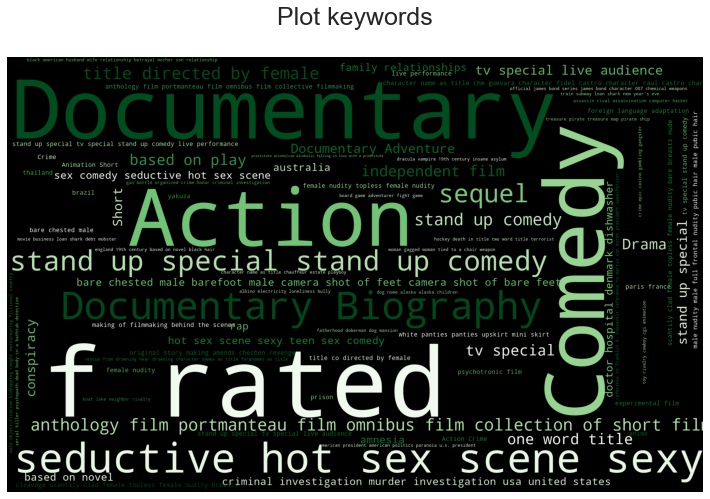

In [32]:
# Plot wordcloud
plot_keywords = wordcloud_generator(df, 'plot_keywords')
f = plt.figure(figsize=(20, 8)) 
plt.imshow(plot_keywords) 
plt.axis('off') 
plt.title('Plot keywords\n', fontsize=25)
plt.show()

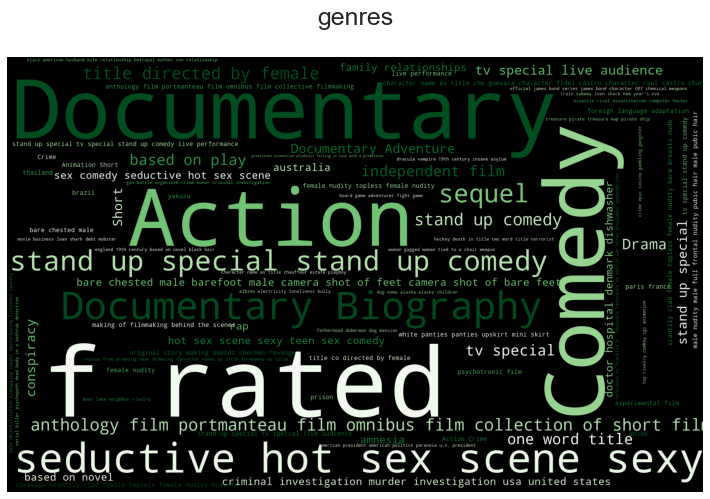

In [33]:
# Plot genres
plot_genres = wordcloud_generator(df, 'genres')
f = plt.figure(figsize=(20, 8)) 
plt.imshow(plot_keywords) 
plt.axis('off') 
plt.title('genres\n', fontsize=25)
plt.show()

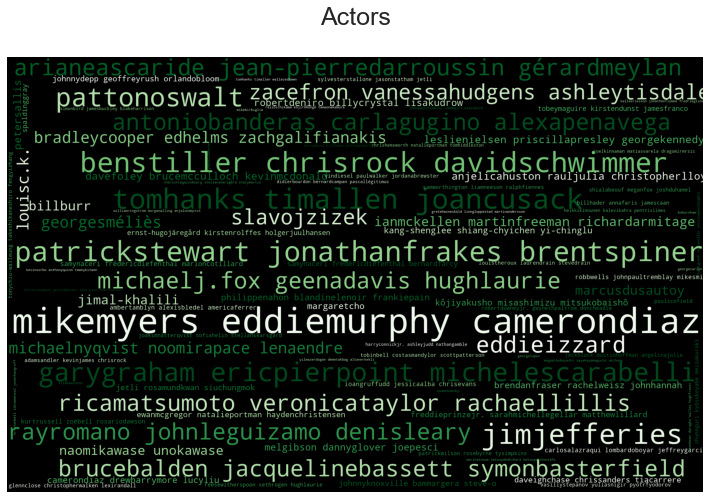

In [34]:
# Generate a wordcloud using the 2000 most frequently occuring actors' names in the dataset
df['title_cast'] = df['title_cast'].apply(lambda x: " ".join(x))
actors = wordcloud_generator(df, 'title_cast')

# plot the WordCloud                        
f = plt.figure(figsize=(20, 8)) 
plt.imshow(actors) 
plt.axis('off') 
plt.title('Actors\n', fontsize=25)
plt.show()

According to the wordcloud, the most frequently searched key words are: Documentary, action, Comedy, sex, and Rated are the most popular movies. Furthermore, we can see that the searched genres are nearly identical to keywords; genres such as Action, Documentary, rated, and so on are prominent in this category. While it is clear that users primarily look for actors such as Eddie Murphy, Cameron Diaz, and Mike Myers.

# [5. Data Engineering](#prep)

Multidimensional scaling (MDS) is a technique for visualizing distances between objects on a map, where the distance is known between pairs of the objects.

In [35]:
def data_scaler(df):
    """
    Scales data.
    """
    scaler = StandardScaler(with_std=True)
    scaled_data = scaler.fit_transform(df)
    return scaled_data

In [36]:
scaled_genome = data_scaler(genome_scores.sample(frac=0.0001))

In [37]:
tsne = TSNE(3, n_jobs = -1, verbose = 2, perplexity = 10, learning_rate = 0.1)
tsne.fit(scaled_genome)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1558 samples in 0.007s...
[t-SNE] Computed neighbors for 1558 samples in 0.028s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1558
[t-SNE] Computed conditional probabilities for sample 1558 / 1558
[t-SNE] Mean sigma: 0.105217
[t-SNE] Computed conditional probabilities in 0.022s
[t-SNE] Iteration 50: error = 89.6654358, gradient norm = 0.0000401 (50 iterations in 0.721s)
[t-SNE] Iteration 100: error = 89.6654358, gradient norm = 0.0000046 (50 iterations in 0.809s)
[t-SNE] Iteration 150: error = 89.6654358, gradient norm = 0.0000023 (50 iterations in 0.519s)
[t-SNE] Iteration 200: error = 89.6654358, gradient norm = 0.0000030 (50 iterations in 0.444s)
[t-SNE] Iteration 250: error = 89.6654358, gradient norm = 0.0000054 (50 iterations in 0.508s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.665436
[t-SNE] Iteration 300: error = 4.9872055, gradient norm = 0.0000089 (50 iterations in 0.605s)

TSNE(learning_rate=0.1, n_components=3, n_jobs=-1, perplexity=10, verbose=2)

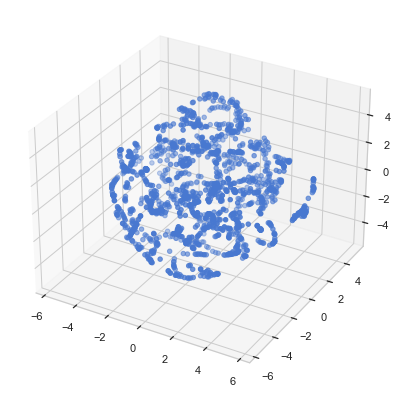

In [38]:
Axes3D

fig = plt.figure(figsize=(14, 7))

# Add 3D scatter plot
ax = fig.add_subplot(projection='3d')
ax.scatter(tsne.embedding_[:,0], tsne.embedding_[:,1], tsne.embedding_[:,2])
plt.show()

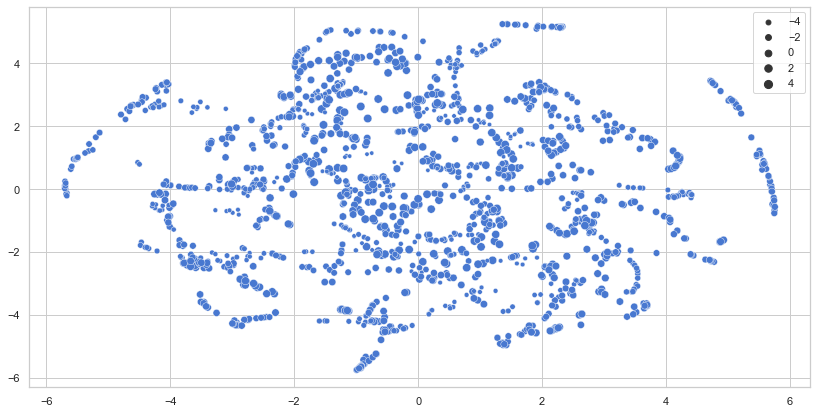

In [39]:
fig = plt.figure(figsize=(14, 7))
sns.scatterplot(x = tsne.embedding_[:,0], y = tsne.embedding_[:,1], size=tsne.embedding_[:,2])
plt.show()

In [40]:
# Below is the dataframe we will be altering.
dataframe = train_df.drop(columns='timestamp')

In [41]:
df_movies = dataframe.set_index('movieId').join([movies_df[['movieId',
                                                           'genres']]
                                                   .set_index('movieId'),
                                                  imbd_data_df[['movieId',
                                                         'title_cast',
                                                         'director',
                                                         'plot_keywords']].
                                                   set_index('movieId')],
                                                  how='left').reset_index()
df_movies.head()

,movieId,userId,rating,genres,title_cast,director,plot_keywords
0,1,158849,5.0,Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation
1,1,97203,5.0,Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation
2,1,161871,3.0,Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation
3,1,45117,4.0,Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation
4,1,27431,5.0,Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation


In [42]:
def preprocessor_train(df):
    dataframe = df.copy()

    # Merge
    df_movies = dataframe.set_index('movieId').join([movies_df
                                                       [['movieId', 'genres']].
                                                       set_index('movieId'),
                                                       imbd_data_df[['movieId',
                                                             'title_cast',
                                                             'director',
                                                             'plot_keywords']].
                                                       set_index('movieId')],
                                                      how='left').reset_index()

# '(no genre listed)' is an equivalent of a missing value in the column genres

    df_movies['genres'] = ['' if x == '(no genres listed)' else x for x in df_movies['genres']]

    # filling missing values with 'nothing'... (emptying...?)
    df_movies.fillna('', inplace=True)

    for col in df_movies.select_dtypes('object').columns: # selecting 'object' columns

        # removing white space
        df_movies[col] = [''.join(x.split()) for x in df_movies[col]]

        # substituting '|' with a white space
        df_movies[col] = [' '.join(x.split('|')) for x in df_movies[col]]

    # joining the features of interest
    df_movies['corpus'] =  df_movies[df_movies.select_dtypes('object').columns].apply(lambda x: ' '.join(x), axis=1)
    return df_movies[['movieId', 'userId', 'corpus', 'rating']]

In [43]:
def preprocessor_test(df):
    dataframe_framed = df.copy()

    # Merge
    df_movies = dataframe_framed.set_index('movieId').join([movies_df
                                                       [['movieId', 'genres']].
                                                       set_index('movieId'),
                                                       imbd_data_df[['movieId',
                                                             'title_cast',
                                                             'director',
                                                             'plot_keywords']].
                                                       set_index('movieId')],
                                                      how='left').reset_index()

# '(no genre listed)' is an equivalent of a missing value in the column genres

    df_movies['genres'] = ['' if x == '(no genres listed)' else x for x in df_movies['genres']]

    # filling missing values with 'nothing'... (emptying...?)
    df_movies.fillna('', inplace=True)

    for col in df_movies.select_dtypes('object').columns: # selecting 'object' columns

        # removing white space
        df_movies[col] = [''.join(x.split()) for x in df_movies[col]]

        # substituting '|' with a white space
        df_movies[col] = [' '.join(x.split('|')) for x in df_movies[col]]

    # joining the features of interest
    df_movies['corpus'] =  df_movies[df_movies.select_dtypes('object').columns].apply(lambda x: ' '.join(x), axis=1)
    return df_movies[['movieId', 'userId', 'corpus']]

In [44]:
Test = preprocessor_test(test_df)

In [45]:
Train = preprocessor_train(train_df.drop(columns=['timestamp'])) 

In [46]:
Train_preprocessor = Train.drop(columns=['rating', 'userId', 'movieId'])
Test_preprocessor = Test.drop(columns=['userId', 'movieId'])

In [47]:
y = Train['rating']

In [48]:
cv = CountVectorizer()
train_mat =cv.fit_transform(Test_preprocessor['corpus'])

In [49]:
Test_mat = cv.transform(Test_preprocessor ['corpus'])

In [50]:
train_mat.shape

(5000019, 123200)

# [6. Modelling](#mod)

The process of modeling means training a machine learning algorithm to predict the labels from the features, tuning it for the business need, and validating it on holdout data.

* ### [Content-Based Filtering Recommendation](#CB)

Content-based filtering uses item features to recommend other items similar to what the user likes, based on their previous actions or explicit feedback.Collaborative filtering uses similarities between users and items simultaneously to provide recommendations. This allows for serendipitous recommendations; that is, collaborative filtering models can recommend an item to user A based on the interests of a similar user B. Furthermore, the embeddings can be learned automatically, without relying on hand-engineering of features.

#### Linear Regression Model
Linear regression is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.. This is represented by a straight line with the equation:
$$ y = a + bx$$   
where $a$ is the intercept of the line with the y-axis, and $b$ is the gradient.  


In [ ]:
#linear regression model 
linear_regression_estimators= []
linear_regression_estimators.append(('standardize',
                    StandardScaler(with_mean=False)))
linear_regression_estimators.append(('mod',
                    LinearRegression()))
linear_model = Pipeline(linear_regression_estimators)
linear_model.fit(train_mat, y)

Linear regression is used to calculate or predict the probability of a binary event occurring.

### [Collaborative-Based Filtering Reccomendation](#CB1)
Collaborative filtering addresses some of the limitations of content-based filtering; collaborative filtering uses similarities between users and items simultaneously to provide recommendations. This allows for serendipitous recommendations; that is, collaborative filtering models can recommend an item to user A based on the interests of a similar user B. Furthermore, the embeddings can be learned automatically, without relying on hand-engineering of features.

In [3]:
#Join df_imdb and df_movies datasets 
imbd_movie = imbd_data_df.merge(movies_df, on='movieId')
#Show text data to be used for analysis 
imbd_movie[['title', 'title_cast', 'director', 'plot_keywords', 'genres']].head()

,title,title_cast,director,plot_keywords,genres
0,Toy Story (1995),Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation,Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,board game|adventurer|fight|game,Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,boat|lake|neighbor|rivalry,Comedy|Romance
3,Waiting to Exhale (1995),Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,black american|husband wife relationship|betra...,Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,fatherhood|doberman|dog|mansion,Comedy


In [4]:
#Fill NaN for each value with a corresponding filling string
imbd_movie['title_cast'].fillna('no title_cast listed',inplace=True)
imbd_movie['plot_keywords'].fillna('no plot_keywords listed ',inplace=True)
imbd_movie['director'].fillna('no director listed',inplace=True)

In [5]:
#Initiatlise the empty list 'plot_key'
plot_key = []
#Iterate through the 'plot_keywords' column
for i in imbd_movie['plot_keywords']:
#Split the plot keyword on the '|' character and append the list of words to the empty list
    plot_key.append(i.split('|'))

In [6]:
#Update the column with the new plot_keys seperated into a list
imbd_movie['plot_keywords'] = plot_key

In [7]:
#Initiatlise the empty list 'title_cast'
title_cast = []
#Iterate through the 'title_cast'' column
for i in imbd_movie['title_cast']:
#Split the plot keyword on the '|' character and append the list of words to the empty list
    title_cast.append(i.split('|'))

In [8]:
#Update the column with the new title_cast seperated into a list
imbd_movie['title_cast'] = title_cast

In [9]:
#Initiatlise the empty list 'genre_list'
genre_list = []
#Iterate through the 'genres' column
for i in imbd_movie['genres']:
#Split the plot keyword on the '|' character and append the list of words to the empty list
    genre_list.append(i.split('|'))

In [10]:
#Update the column with the new genre seperated into a list
imbd_movie['genres'] = genre_list

In [11]:
#View of reworked dataset
imbd_movie[['title', 'title_cast', 'director', 'plot_keywords', 'genres']].head()

,title,title_cast,director,plot_keywords,genres
0,Toy Story (1995),"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,"[toy, rivalry, cowboy, cgi animation]","[Adventure, Animation, Children, Comedy, Fantasy]"
1,Jumanji (1995),"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Jonathan Hensleigh,"[board game, adventurer, fight, game]","[Adventure, Children, Fantasy]"
2,Grumpier Old Men (1995),"[Walter Matthau, Jack Lemmon, Sophia Loren, An...",Mark Steven Johnson,"[boat, lake, neighbor, rivalry]","[Comedy, Romance]"
3,Waiting to Exhale (1995),"[Whitney Houston, Angela Bassett, Loretta Devi...",Terry McMillan,"[black american, husband wife relationship, be...","[Comedy, Drama, Romance]"
4,Father of the Bride Part II (1995),"[Steve Martin, Diane Keaton, Martin Short, Kim...",Albert Hackett,"[fatherhood, doberman, dog, mansion]",[Comedy]


In [12]:
def string_function(x):
    """merges name and surname into one name"""
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [13]:
features = ['title_cast','director','plot_keywords','genres']

for feature in features:
    imbd_movie[feature] = imbd_movie[feature].apply( string_function)

In [14]:
def create_sentence(x):
    return ' '.join(x['plot_keywords']) + ' ' + ' '.join(x['title_cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
imbd_movie['sentence'] = imbd_movie.apply(create_sentence, axis=1)

In [15]:
imbd_movie.head()

,movieId,title_cast,director,runtime,budget,plot_keywords,title,genres,sentence
0,1,"[tomhanks, timallen, donrickles, jimvarney, wa...",johnlasseter,81.0,"$30,000,000","[toy, rivalry, cowboy, cgianimation]",Toy Story (1995),"[adventure, animation, children, comedy, fantasy]",toy rivalry cowboy cgianimation tomhanks timal...
1,2,"[robinwilliams, jonathanhyde, kirstendunst, br...",jonathanhensleigh,104.0,"$65,000,000","[boardgame, adventurer, fight, game]",Jumanji (1995),"[adventure, children, fantasy]",boardgame adventurer fight game robinwilliams ...
2,3,"[waltermatthau, jacklemmon, sophialoren, ann-m...",markstevenjohnson,101.0,"$25,000,000","[boat, lake, neighbor, rivalry]",Grumpier Old Men (1995),"[comedy, romance]",boat lake neighbor rivalry waltermatthau jackl...
3,4,"[whitneyhouston, angelabassett, lorettadevine,...",terrymcmillan,124.0,"$16,000,000","[blackamerican, husbandwiferelationship, betra...",Waiting to Exhale (1995),"[comedy, drama, romance]",blackamerican husbandwiferelationship betrayal...
4,5,"[stevemartin, dianekeaton, martinshort, kimber...",alberthackett,106.0,"$30,000,000","[fatherhood, doberman, dog, mansion]",Father of the Bride Part II (1995),[comedy],fatherhood doberman dog mansion stevemartin di...


In [16]:
#  Create the count matrix
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(imbd_movie['sentence'])

In [17]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [18]:
imbd_movie = imbd_movie.reset_index()
indices = pd.Series(imbd_movie.index, index=imbd_movie['title'])

In [19]:
def get_recommendations(title, cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return imbd_movie['title'].iloc[movie_indices]

In [20]:
# Get similar movies 
get_recommendations('American Beauty (1999)', cosine_sim)

881     Breakfast at Tiffany's (1961)
891                 Casablanca (1942)
911     Affair to Remember, An (1957)
935             Penny Serenade (1941)
953                    Algiers (1938)
1195            Quiet Man, The (1952)
1253         Somewhere in Time (1980)
1257    Some Kind of Wonderful (1987)
1262       Room with a View, A (1986)
1271              Paris, Texas (1984)
Name: title, dtype: object

In [21]:
# Load the 1M dataset
train_df = train_df.drop('timestamp', axis=1)
train_subset = train_df[:1000000]
reader = Reader(rating_scale=(train_df['rating'].min(), train_df['rating'].max()))
data = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=42)

### Training models and getting the predictions 

#### Non-Negative Matrix Factorization Algorithm
Non-Negative Matrix Factorization uses techniques from multivariate analysis and linear algebra. It decomposes the data as a matrix M into the product of two lower ranking matrices W and H. The sub-matrix W contains the NMF basis; the sub-matrix H contains the associated coefficients

In [22]:
nmf_model = NMF(n_epochs=50, n_factors=200, random_state=42,verbose=True)
nmf_model.fit(trainset)
nmf_predictions =nmf_model.test(testset)
nmf_rmse = accuracy.rmse(nmf_predictions)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
RMSE: 1.15

#### CoClustering Algorithm
co-clustering, or two-mode clustering is a data mining technique which allows simultaneous clustering of the rows and columns of a matrix

In [23]:
cc_model = CoClustering(n_epochs=50,random_state=42)
cc_model.fit(trainset)
cc_predictions = cc_model.test(testset)
cc_rmse=accuracy.rmse(cc_predictions)

RMSE: 0.8963


#### Singular Value Decomposition (SVD)
Singular value decomposition (SVD) is a collaborative filtering method for movie recommendation. The aim for the code implementation is to provide users with movies' recommendation from the latent features of item-user matrices. The code would show you how to use the SVD latent factor model for matrix factorization.

In [24]:
svd_model = SVD(n_epochs=50,n_factors=400,init_std_dev=0.01,random_state=42,verbose=True)
svd_model.fit(trainset)
svd_predictions = svd_model.test(testset)
svd_rmse = accuracy.rmse(svd_predictions)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
RMSE: 0.80

### Model Performance 

Model performance is an assessment of the model's ability to perform a task accurately not only with training data but also in real-time with runtime data when the model is actually deployed through a website or an app.Therefore our streamlit app will also show how our models performed 

We built and tested three different collaborative filtering models and compared their performance using a statistical measure known as the root mean squared error (**RMSE**), which determines the average squared difference between the estimated values and the actual value. A low RMSE value indicates high model accuracy.

### Root Mean Squared Error (RMSE):
$$RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$   

so lets see which model performed better and which model we can try to impprove its performance 

In [25]:
rmse_scores =[nmf_rmse,cc_rmse,svd_rmse]
trained_models =['NMF','CoClustering','SVD']

model_performance = pd.DataFrame({'model':trained_models,'RMSE':rmse_scores})

In [26]:
model_performance.sort_values(by='RMSE')

,model,RMSE
2,SVD,0.807757
1,CoClustering,0.896252
0,NMF,1.156371


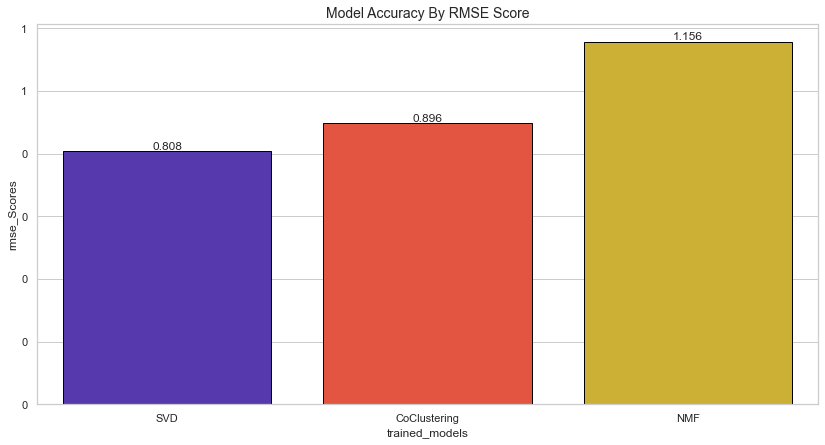

In [27]:
fig, ax = plt.subplots(figsize=(14,7))
sns.barplot(data=model_performance.sort_values(by='RMSE'), x='model', y='RMSE', palette="CMRmap", edgecolor="black", ax=ax)
ax.set_xlabel("trained_models")
ax.set_ylabel('rmse_Scores')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), round(p.get_height(),3), fontsize=12, ha="center", va='bottom')
plt.title('Model Accuracy By RMSE Score', fontsize=14)
plt.show()

The table abvove shows the model accuracy by RMSE score that compares the models we have used. Looking at the three models that we used, we can see that Non-Negative Matrix Factorization has the worst performance because it has a high RMSE so we can say that the model wwill not be able to perform a task accurately. 
CoClustering comes as our second best model, it gives a good accuracy score, however Singular value decomposition model gave the best accuracy score as it has the smallest RMSE score 

### Hyperparameter Tuning 

Hyperparameters are parameters whose values control the learning process and determine the values of model parameters that a learning algorithm ends up learning

Hyperparameter tuning is an essential part of controlling the behavior of a machine learning model. If we don't correctly tune our hyperparameters, our estimated model parameters produce suboptimal results, as they don't minimize the loss function. This means our model makes more errors

In [23]:
# Hypertuning Singular Value Decomposition
trainset, testset = train_test_split(data, test_size=0.01, random_state=42)

# Modelling
svd_algo_hyper = SVD(lr_all=0.0085,
                     reg_all=0.01,
                     n_epochs=20,
                     init_std_dev=0.001,
                     random_state= 450)
svd_algo_hyper.fit(trainset)

# Predicting
svd_hyper_predictions = svd_algo_hyper.test(testset)

# Convert the predictions to dataframe
accuracy.rmse(svd_hyper_predictions)

RMSE: 0.7898


0.7897912021959559

Using the hyperparameter tuning the rmse has decreased which indicates a high accuracy score of 0.7898 

In [24]:
pred_svd_hyper = [svd_algo_hyper.predict(row.userId,row.movieId) for idx,row in test_df.iterrows()]

# Converting the predictions to a dataframe
test_pred_svd_hyper = pd.DataFrame(pred_svd_hyper)

### Submission

In [25]:
# Rename the fields in the prediction dataframe
test_pred_svd_hyper.drop(['r_ui', 'details'], axis=1, inplace=True)
test_pred_svd_hyper =test_pred_svd_hyper.rename(columns={'uid':'userId',
                                                          'iid':'movieId',
                                                          'est':'rating'})
test_pred_svd_hyper.head()

,userId,movieId,rating
0,1,2011,2.929061
1,1,4144,4.172703
2,1,5767,3.738488
3,1,6711,4.105886
4,1,7318,2.775594


In [26]:
# Concatenate each userId and movieId into a one column for submission
test_pred_svd_hyper['Id'] = test_pred_svd_hyper['userId'].astype(str).str.zfill(1) + '_' + test_pred_svd_hyper['movieId'].astype(str).str.zfill(1)

In [27]:
svd_predictions_hyper = test_pred_svd_hyper[['Id','rating']]
svd_predictions_hyper.head()

,Id,rating
0,1_2011,2.929061
1,1_4144,4.172703
2,1_5767,3.738488
3,1_6711,4.105886
4,1_7318,2.775594


In [28]:
svd_predictions_hyper.to_csv('./svd_pre_hyper_submission.csv', index=False)

### Conclusion 

In [ ]:
# Pickle File
model_save_path = "svd_algo_hyper.pkl"

with open(model_save_path, "wb") as file: 
    pickle.dump(svd_algo_hyper, file)